In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"E:\Attention_Unet\Attention-Gated-Networks\train.csv")
category_num = 3

In [3]:
list_ = []
for i in range(0,len(data['slice']),category_num):
    list_.append(data['slice'][i])

In [4]:
sum_l = []
summ = 0
for i in range(len(list_)):
    if list_[i] == 1:
        apd = 1
        if apd == 1 :
            sum_l.append(summ)
            summ = 0
            apd = 0
    summ += 1
sum_l.append(list_[-1])

In [5]:
del(sum_l[0])

In [6]:
start = 0
tagging = []
for i in range(len(sum_l)):
    for j in range(sum_l[i]):
        tagging.append(list_[start+j]/sum_l[i])
    start +=sum_l[i]

In [7]:
copy = []
for i in range(len(list_)):
    copy.append(tagging[i])
    copy.append(tagging[i])
    copy.append(tagging[i])

In [8]:
data['tagging'] = copy

In [9]:
data.to_csv(r"E:\Attention_Unet\Attention-Gated-Networks\train.csv")

In [33]:
import pandas as pd

In [34]:
distribution = pd.read_csv(r"E:\Attention_Unet\Attention-Gated-Networks\distribution.csv")

In [35]:
distribution.head()

,Unnamed: 0,timestamp,channel_0,channel_1,channel_2
0,0,0.006944,0,0,0
1,1,0.013889,0,0,0
2,2,0.020833,0,0,0
3,3,0.027778,0,0,0
4,4,0.034722,0,0,0


In [47]:
a = distribution.groupby('timestamp',as_index=False).aggregate(sum)

In [24]:
a.to_csv(r"E:\Attention_Unet\Attention-Gated-Networks\te.csv")

In [48]:
a.head()

,timestamp,Unnamed: 0,channel_0,channel_1,channel_2
0,0.006944,3027104,0,0,0
1,0.012500,197616,0,0,0
2,0.013889,3027306,0,0,0
3,0.020833,3027508,0,0,0
4,0.025000,197629,1,0,1


In [54]:
df = a.drop(['Unnamed: 0'],axis=1)

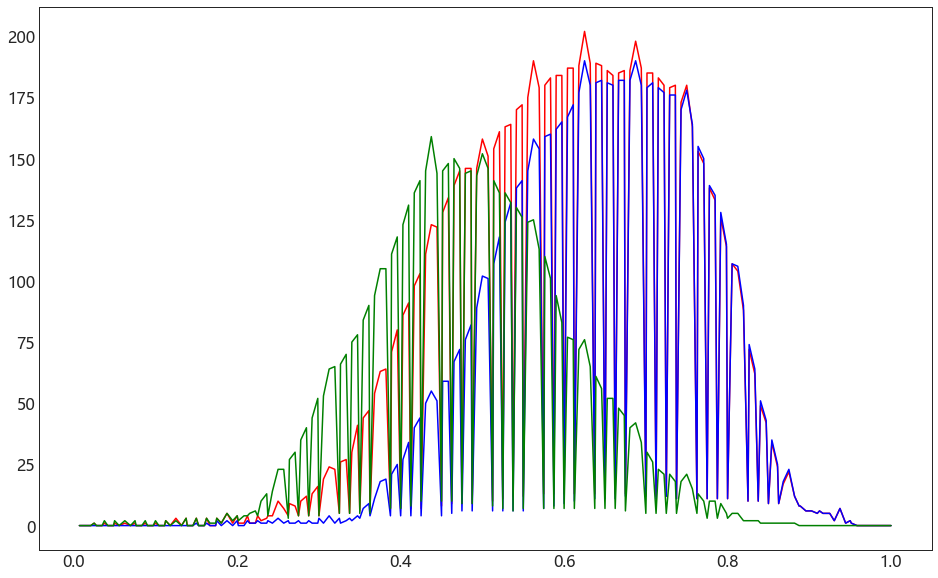

In [58]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from torch.autograd import Variable
import torch
#正态分布的概率密度函数。可以理解成 x 是 mu（均值）和 sigma（标准差）的函数
def normfun(x,mu,sigma):
    return np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
 
# df = pd.read_csv('trans_grafana_data_export.csv')
y0 = np.array(df['channel_0'].tolist())
y1 = np.array(df['channel_1'].tolist())
y2 = np.array(df['channel_2'].tolist())
x = np.array(df['timestamp'].tolist())
plt.plot(x, y0, 'r')
plt.plot(x, y1, 'b')
plt.plot(x, y2, 'g')
plt.show()

In [89]:
loss_fn = torch.nn.MSELoss()
def minnormfun(x,cpuindex,cpu):
    pdf = torch.exp(-((cpuindex - x[0])**2)/(2*x[1]**2)) / (x[1] * np.sqrt(2*np.pi))
    return loss_fn(pdf*x[2],cpu)

with torch.cuda.device(0):
    x = Variable(torch.DoubleTensor([0.5,0.5,0.5]),requires_grad = True)
    cpu = np.array(df['channel_0'].tolist())/300.0
    cpuindex = np.array(df['timestamp'].tolist())
    cpu = torch.from_numpy(cpu)
    cpuindex = torch.from_numpy(cpuindex)
    print(type(x))
    optimizer = torch.optim.Adam([x],lr=1e-3)

    for step in range(10000):
        pred = minnormfun(x,cpuindex,cpu)
        optimizer.zero_grad()
        pred.backward()
        optimizer.step()
        if step % 2000 == 0:
            print('step{}:x={},f(x)={}'.format(step, x.tolist(), pred.item()))

y0_paramter = x

<class 'torch.Tensor'>
step0:x=[0.5009999998111976, 0.50099999991337, 0.499000000048651],f(x)=0.07148500375038064
step2000:x=[0.6175172744572235, 0.1517647951990684, 0.18460631021862242],f(x)=0.02424569802435372
step4000:x=[0.6175172744572236, 0.15176479519906838, 0.18460631021862242],f(x)=0.024245698024353723
step6000:x=[0.6175172744572236, 0.15176479519906838, 0.18460631021862242],f(x)=0.024245698024353723
step8000:x=[0.6175172744572237, 0.15176479519906838, 0.18460631021862242],f(x)=0.024245698024353723


In [90]:
with torch.cuda.device(0):
    x = Variable(torch.DoubleTensor([0.5,0.5,0.5]),requires_grad = True)
    cpu = np.array(df['channel_1'].tolist())/300.0
    cpuindex = np.array(df['timestamp'].tolist())
    cpu = torch.from_numpy(cpu)
    cpuindex = torch.from_numpy(cpuindex)
    print(type(x))
    optimizer = torch.optim.Adam([x],lr=1e-3)

    for step in range(10000):
        pred = minnormfun(x,cpuindex,cpu)
        optimizer.zero_grad()
        pred.backward()
        optimizer.step()
        if step % 2000 == 0:
            print('step{}:x={},f(x)={}'.format(step, x.tolist(), pred.item()))

y1_paramter = x

<class 'torch.Tensor'>
step0:x=[0.5009999998284362, 0.5009999999407736, 0.49900000003826706],f(x)=0.07817034095652176
step2000:x=[0.6556890252787844, 0.12638521124035715, 0.1465951656315271],f(x)=0.018414320927993614
step4000:x=[0.6556890252787845, 0.12638521124035726, 0.14659516563152722],f(x)=0.018414320927993614
step6000:x=[0.6556890252787845, 0.12638521124035726, 0.14659516563152722],f(x)=0.018414320927993614
step8000:x=[0.6556890252787844, 0.12638521124035723, 0.14659516563152725],f(x)=0.018414320927993614
step10000:x=[0.6556890252787844, 0.12638521124035726, 0.14659516563152725],f(x)=0.018414320927993617
step12000:x=[0.6556889100657723, 0.12638508278539895, 0.14659526662591],f(x)=0.018414320928109445
step14000:x=[0.6556890264441367, 0.12638521239604306, 0.14659516445943893],f(x)=0.018414320927993617
step16000:x=[0.6556890252884776, 0.12638521125018976, 0.1465951656219529],f(x)=0.018414320927993617
step18000:x=[0.6556890252830176, 0.12638521124456661, 0.14659516562727537],f(x)=0.0

In [91]:
with torch.cuda.device(0):
    x = Variable(torch.DoubleTensor([0.5,0.5,0.5]),requires_grad = True)
    cpu = np.array(df['channel_2'].tolist())/300.0
    cpuindex = np.array(df['timestamp'].tolist())
    cpu = torch.from_numpy(cpu)
    cpuindex = torch.from_numpy(cpuindex)
    print(type(x))
    optimizer = torch.optim.Adam([x],lr=1e-3)

    for step in range(10000):
        pred = minnormfun(x,cpuindex,cpu)
        optimizer.zero_grad()
        pred.backward()
        optimizer.step()
        if step % 2000 == 0:
            print('step{}:x={},f(x)={}'.format(step, x.tolist(), pred.item()))
            
y2_paramter = x

<class 'torch.Tensor'>
step0:x=[0.4990000017483295, 0.5009999999493949, 0.49900000003237815],f(x)=0.07239741433401911
step2000:x=[0.4800139557835763, 0.12009864707691155, 0.10670832816616589],f(x)=0.009940299671887455
step4000:x=[0.48006423306406676, 0.12091414230553728, 0.10738180468606828],f(x)=0.009939508422619666
step6000:x=[0.48006423306406676, 0.12091414230553728, 0.10738180468606828],f(x)=0.009939508422619666
step8000:x=[0.4800642330640668, 0.12091414230553728, 0.10738180468606828],f(x)=0.009939508422619666
step10000:x=[0.4800642344782929, 0.12091414229439194, 0.10738180468725571],f(x)=0.009939508422619668
step12000:x=[0.48006423272279436, 0.12091414232095862, 0.10738180467845278],f(x)=0.009939508422619668
step14000:x=[0.48006423695184697, 0.12091413835911968, 0.10738180859823404],f(x)=0.009939508422619732
step16000:x=[0.48006423041094365, 0.12091414488493762, 0.1073818019850216],f(x)=0.009939508422619807
step18000:x=[0.48006423306443496, 0.12091414230514014, 0.10738180468641485

通道0的均值为:0.617517,通道0的标准差为:0.151765
通道1的均值为:0.655689,通道1的标准差为:0.126385
通道2的均值为:0.480064,通道2的标准差为:0.120914


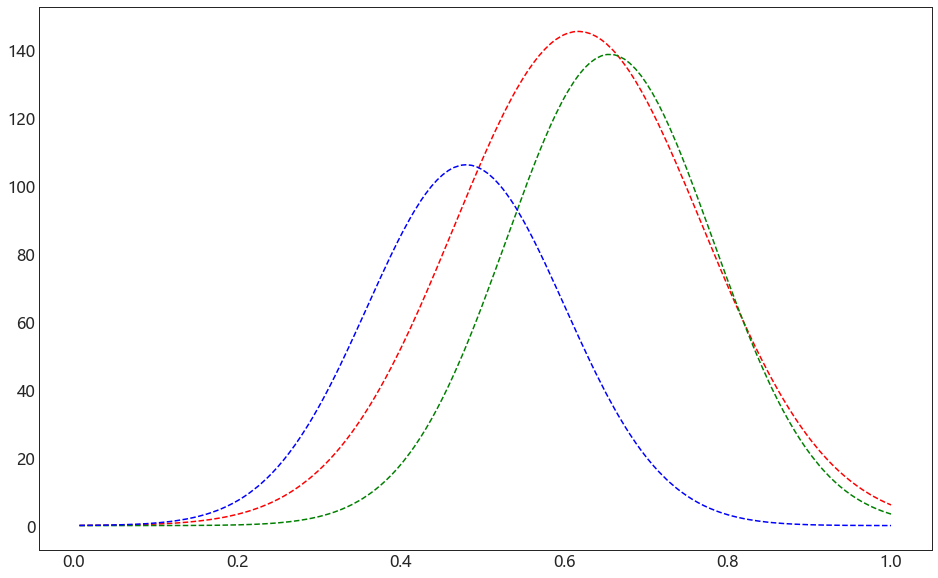

In [100]:
cpuindex = np.array(df['timestamp'].tolist())
cpu = (np.exp(-((cpuindex - y0_paramter[0].item())**2)/(2*y0_paramter[1].item()**2)) / (y0_paramter[1].item() * np.sqrt(2*np.pi)))*y0_paramter[2].item()*300
plt.plot(cpuindex, cpu, 'r--')
print("通道0的均值为:{:.6f},通道0的标准差为:{:.6f}".format(y0_paramter[0].item(),y0_paramter[1].item()))

# cpu = np.array(df['channel_0'].tolist())
# cpuindex = np.array(df['timestamp'].tolist())
# plt.plot(cpuindex, cpu, 'r--')

cpuindex = np.array(df['timestamp'].tolist())
cpu = (np.exp(-((cpuindex - y1_paramter[0].item())**2)/(2*y1_paramter[1].item()**2)) / (y1_paramter[1].item() * np.sqrt(2*np.pi)))*y1_paramter[2].item()*300
plt.plot(cpuindex, cpu, 'g--')
print("通道1的均值为:{:.6f},通道1的标准差为:{:.6f}".format(y1_paramter[0].item(),y1_paramter[1].item()))
 
# cpu = np.array(df['channel_1'].tolist())
# cpuindex = np.array(df['timestamp'].tolist())
# plt.plot(cpuindex, cpu, 'g--')

cpuindex = np.array(df['timestamp'].tolist())
cpu = (np.exp(-((cpuindex - y2_paramter[0].item())**2)/(2*y2_paramter[1].item()**2)) / (y2_paramter[1].item() * np.sqrt(2*np.pi)))*y2_paramter[2].item()*300
plt.plot(cpuindex, cpu, 'b--')
print("通道2的均值为:{:.6f},通道2的标准差为:{:.6f}".format(y2_paramter[0].item(),y2_paramter[1].item()))

# cpu = np.array(df['channel_2'].tolist())
# cpuindex = np.array(df['timestamp'].tolist())
# plt.plot(cpuindex, cpu, 'b--')
plt.show()

In [22]:
import numpy as np
np.exp(-((0.48 - 0.48)**2)/(2*(0.1209**2))) / (0.1209 * np.sqrt(2*np.pi))*0.1074*300/106.3186

1.0000001193825938